## Package loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
plt.rcParams['figure.dpi'] = 100  # adjust fig size in notebook
InteractiveShell.ast_node_interactivity = "all"   # allows for multiple outputs per cell to be shown in notebook


## Data loading and subsetting

In [2]:
# load feature data
df = pd.read_csv("C:/Users/franz/Documents/Bachelor Studium/BachelorArbeit/JupyterLabBA/files/DLCfiles_final_results/res_file.csv")
df = df[df["distance"] != "not_specified"]

# subsetting data
MOPstroke_BL = df[df["group"] == "MOPstroke_BL"].copy()
MOPstroke_P3 = df[df["group"] == "MOPstroke_P3"].copy()
MOPstroke_P28 = df[df["group"] == "MOPstroke_P28"].copy()
MOSstroke_BL = df[df["group"] == "MOSstroke_BL"].copy()
MOSstroke_P3 = df[df["group"] == "MOSstroke_P3"].copy()
MOSstroke_P28 = df[df["group"] == "MOSstroke_P28"].copy()
WMstroke_BL = df[df["group"] == "WMstroke_BL"].copy()
WMstroke_P3 = df[df["group"] == "WMstroke_P3"].copy()
WMstroke_P28 = df[df["group"] == "WMstroke_P28"].copy()
MOPMOSsham_BL = df[df["group"] == "MOPMOSsham_BL"].copy()
MOPMOSsham_P3 = df[df["group"] == "MOPMOSsham_P3"].copy()
MOPMOSsham_P28 = df[df["group"] == "MOPMOSsham_P28"].copy()
WMsham_BL = df[df["group"] == "WMsham_BL"].copy()
WMsham_P3 = df[df["group"] == "WMsham_P3"].copy()
WMsham_P28 = df[df["group"] == "WMsham_P28"].copy()

In [3]:
# name two or three files to compare with classifier
df1 = WMsham_BL
df2 = WMsham_P3
df3 = pd.DataFrame()

## Data pre-processing

In [5]:
# check for NaN values
df1.isnull().sum().sum()
df2.isnull().sum().sum()
df3.isnull().sum().sum()

# drop rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

5

2

0.0

In [6]:
# concat dataframes
df = pd.concat([df1, df2, df3])
df["group"].value_counts()

# remove unnecessary columns
df = df.drop(['file_name', 'reason_end'], axis=1)

WMsham_P3    42
WMsham_BL    39
Name: group, dtype: int64

In [7]:
# separate data in response and feature variables
X = df.drop("group", axis=1)
y = df["group"]
# make sure all series in X are numeric
X = X.apply(pd.to_numeric)
# encode labels in y as numerals
le = LabelEncoder()
le.fit(["MOPstroke_BL", "MOPstroke_P3", "MOPstroke_P28", "MOSstroke_BL", "MOSstroke_P3", "MOSstroke_P28", "WMstroke_BL", "WMstroke_P3", "WMstroke_P28", "MOPMOSsham_BL", "MOPMOSsham_P3", "MOPMOSsham_P28", "WMsham_BL", "WMsham_P3", "WMsham_P28"])
y = le.transform(y)

LabelEncoder()

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11])

In [8]:
# split data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Automatic parameter search?
# https://scikit-learn.org/stable/getting_started.html

## Machine Learning Classification


### Random Forest Classifier

              precision    recall  f1-score   support

           9       0.64      1.00      0.78         7
          11       1.00      0.60      0.75        10

    accuracy                           0.76        17
   macro avg       0.82      0.80      0.76        17
weighted avg       0.85      0.76      0.76        17



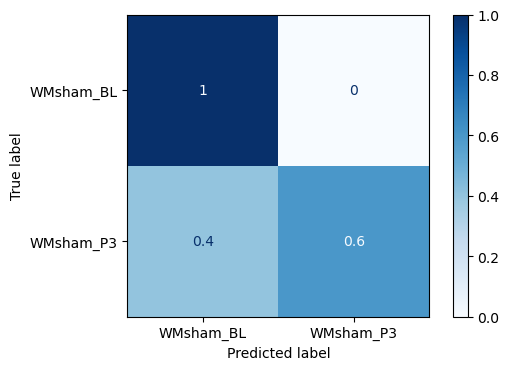

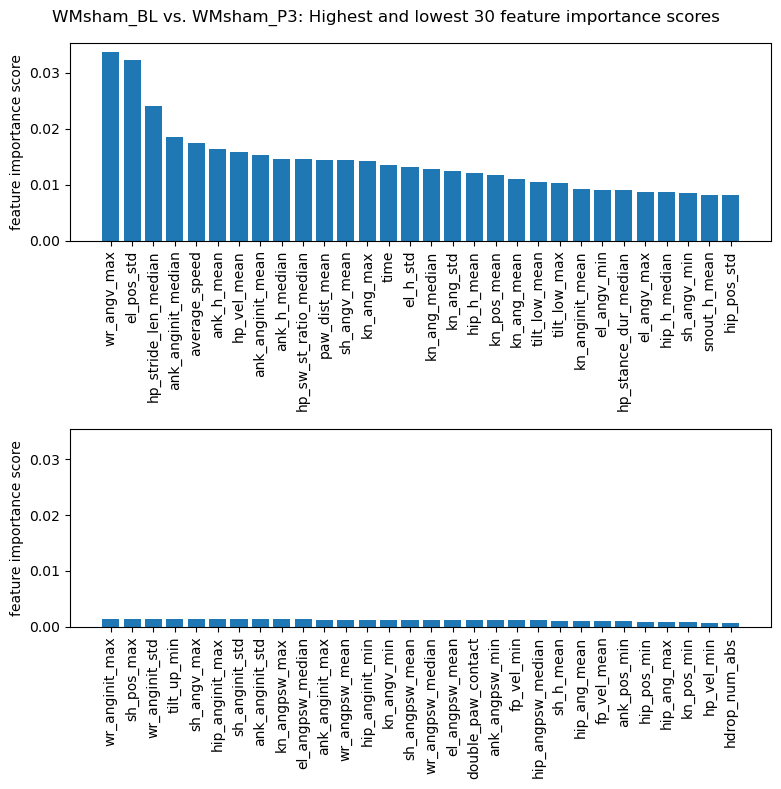

In [11]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=2000, bootstrap=True).fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
plot_confusion_matrix(rfc, X_test, y_test, display_labels=le.inverse_transform(rfc.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_RF = [accuracy_score(y_test, pred_rfc), balanced_accuracy_score(y_test, pred_rfc), f1_score(y_test, pred_rfc, average='weighted')]

### Support-Vector Machine

              precision    recall  f1-score   support

           9       0.64      1.00      0.78         7
          11       1.00      0.60      0.75        10

    accuracy                           0.76        17
   macro avg       0.82      0.80      0.76        17
weighted avg       0.85      0.76      0.76        17



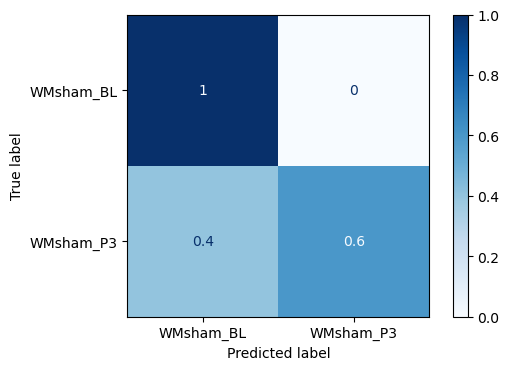

In [12]:
# SVM Classifier
sv = svm.SVC(kernel = 'linear').fit(X_train, y_train)
pred_sv = sv.predict(X_test)
print(classification_report(y_test, pred_sv))

plot_confusion_matrix(sv, X_test, y_test, display_labels=le.inverse_transform(sv.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_SV = [accuracy_score(y_test, pred_sv), balanced_accuracy_score(y_test, pred_sv), f1_score(y_test, pred_sv, average='weighted')]
#plot_feature_importances(sv.coef[0], labels)


### Multi-layer Perceptron Classifier

              precision    recall  f1-score   support

           9       0.64      1.00      0.78         7
          11       1.00      0.60      0.75        10

    accuracy                           0.76        17
   macro avg       0.82      0.80      0.76        17
weighted avg       0.85      0.76      0.76        17



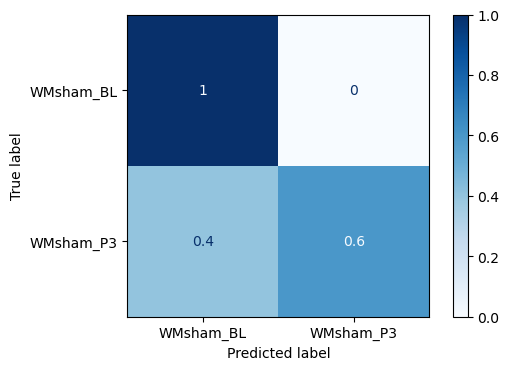

In [13]:
# Neural Network
mlpc = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=1000, learning_rate_init = 0.001).fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))

plot_confusion_matrix(mlpc, X_test, y_test, display_labels=le.inverse_transform(mlpc.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_MLPC = [accuracy_score(y_test, pred_mlpc), balanced_accuracy_score(y_test, pred_mlpc), f1_score(y_test, pred_mlpc, average='weighted')]
# find out how to get feature importances


Text(0.5, 1.0, 'Loss Curve')

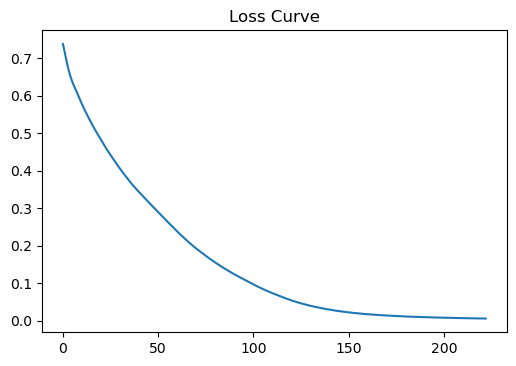

In [14]:
plt.plot(mlpc.loss_curve_)
plt.title("Loss Curve")

### Perceptron

              precision    recall  f1-score   support

           9       0.70      1.00      0.82         7
          11       1.00      0.70      0.82        10

    accuracy                           0.82        17
   macro avg       0.85      0.85      0.82        17
weighted avg       0.88      0.82      0.82        17



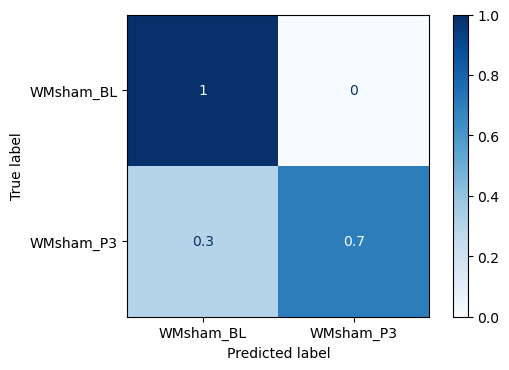

In [15]:
pc = Perceptron().fit(X_train, y_train)
pred_pc = pc.predict(X_test)
print(classification_report(y_test, pred_pc))

plot_confusion_matrix(pc, X_test, y_test, display_labels=le.inverse_transform(pc.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_PC = [accuracy_score(y_test, pred_pc), balanced_accuracy_score(y_test, pred_pc), f1_score(y_test, pred_pc, average='weighted')]


### Logistic Regression Classifier

              precision    recall  f1-score   support

           9       0.64      1.00      0.78         7
          11       1.00      0.60      0.75        10

    accuracy                           0.76        17
   macro avg       0.82      0.80      0.76        17
weighted avg       0.85      0.76      0.76        17



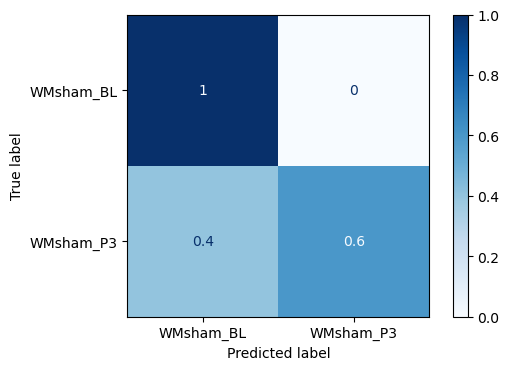

In [16]:
# logistic regression
lr = LogisticRegression().fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(classification_report(y_test, pred_lr))

plot_confusion_matrix(lr, X_test, y_test, display_labels=le.inverse_transform(lr.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_LR = [accuracy_score(y_test, pred_lr), balanced_accuracy_score(y_test, pred_lr), f1_score(y_test, pred_lr, average='weighted')]

#plot_feature_importances(lr.coef_[0])
# Recall this is a classification problem with classes 0 and 1. 
# Notice that the coefficients are both positive and negative. 
# The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

### K Nearest Neighbor Classifier

              precision    recall  f1-score   support

           9       0.78      1.00      0.88         7
          11       1.00      0.80      0.89        10

    accuracy                           0.88        17
   macro avg       0.89      0.90      0.88        17
weighted avg       0.91      0.88      0.88        17



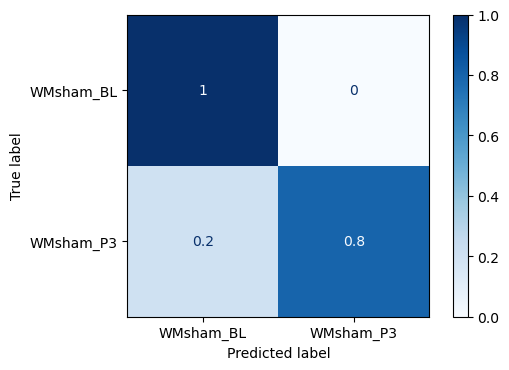

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn))
plot_confusion_matrix(knn, X_test, y_test, display_labels=le.inverse_transform(knn.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_KNN = [accuracy_score(y_test, pred_knn), balanced_accuracy_score(y_test, pred_knn), f1_score(y_test, pred_knn, average='weighted')]

### Radius Neighbor

              precision    recall  f1-score   support

           9       0.41      1.00      0.58         7
          11       0.00      0.00      0.00        10

    accuracy                           0.41        17
   macro avg       0.21      0.50      0.29        17
weighted avg       0.17      0.41      0.24        17



C:\Users\franz\Anaconda3\envs\KinematicAnalyses\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franz\Anaconda3\envs\KinematicAnalyses\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franz\Anaconda3\envs\KinematicAnalyses\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

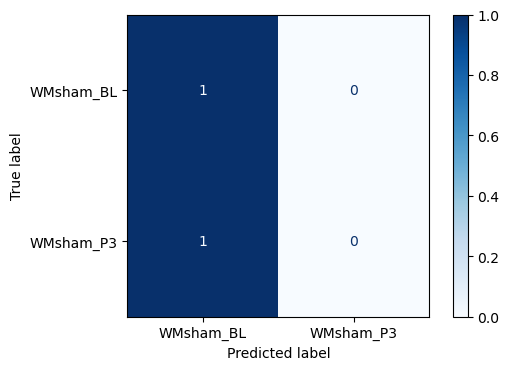

In [18]:
rn = RadiusNeighborsClassifier(radius=10000.0).fit(X_train, y_train)
pred_rn = rn.predict(X_test)
print(classification_report(y_test, pred_rn))
plot_confusion_matrix(rn, X_test, y_test, display_labels=le.inverse_transform(rn.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_RN = [accuracy_score(y_test, pred_rn), balanced_accuracy_score(y_test, pred_rn), f1_score(y_test, pred_rn, average='weighted')]

### Gaussian Naive Bayes

              precision    recall  f1-score   support

           9       0.58      1.00      0.74         7
          11       1.00      0.50      0.67        10

    accuracy                           0.71        17
   macro avg       0.79      0.75      0.70        17
weighted avg       0.83      0.71      0.70        17



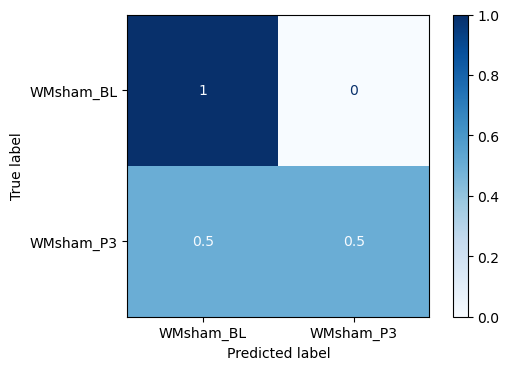

In [19]:
gnb = GaussianNB().fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, pred_gnb))
plot_confusion_matrix(gnb, X_test, y_test, display_labels=le.inverse_transform(gnb.classes_), cmap=plt.cm.Blues, normalize='true')
scoring_GNB = [accuracy_score(y_test, pred_gnb), balanced_accuracy_score(y_test, pred_gnb), f1_score(y_test, pred_gnb, average='weighted')]

## Model Evaluation

In [20]:
scores = [scoring_RF, scoring_SV, scoring_MLPC, scoring_PC, scoring_LR, scoring_KNN, scoring_RN, scoring_GNB]
scores = pd.DataFrame(scores, index=["RF","SV","MLPC","PC","LR","KNN","RN","GNB"], columns = ["Accuracy","Weighted accuracy", "Weighted F1 score"]) 
#scores.to_csv("C:/Users/franz/Documents/Bachelor Studium/BachelorArbeit/JupyterLabBA/files/model_scoring/model_scoring_{}.csv".format(le.inverse_transform(rfc.classes_)),mode="a")
file = pd.read_csv("C:/Users/franz/Documents/Bachelor Studium/BachelorArbeit/JupyterLabBA/files/model_scoring/model_scoring_{}.csv".format(le.inverse_transform(rfc.classes_)))
print("executions: {}".format((len(file)+1)/9))

executions: 10.0
